# Badge Holder Tests

The purpose of these tests was to determine if badges in antistatic / non-antistatic holders behave differently.
Our initial hypothesis is that the antistatic holders were obstructing the bluetooth signal due to the slight conductivitiy of antistatic surfaces. Therefore we expect to see more issues with the antistatic holders' RSSIs than of those in regular holders.

Expected issues include:
    -large variance when readings are taken at a constant distance
    -lower signal strength (higher RSSI), leading to less accurate range calculations.
Ideally, there would be no great difference between holder types, because then either one could be used without affecting data collection.

We will also be watching out for variation between individual badges. Each of these badges came from the same "batch," so we expect that they will have increased precision.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
holders_anti = ["EE:B4:AF:3F:05:80", # Badge 262
                "FF:0C:74:ED:C4:CD", # Badge 263
                "EC:FB:84:DE:35:4A", # Badge 264
                "C5:85:B9:18:8D:C3", # Badge 265
                "CB:5C:4B:7C:43:81", # Badge 266
                "E1:07:CE:CE:52:BE"] # Badge 267

In [3]:
holders_noanti = ["F1:4E:55:EA:ED:A4", # Badge 210
                  "E8:FA:0D:3C:01:82", # Badge 211
                  "C2:57:36:E6:71:6E", # Badge 212
                  "D9:86:6F:AF:E8:90", # Badge 213
                  "C1:96:24:5B:EB:97", # Badge 214
                  "C8:2F:80:DA:26:94"] # Badge 215

# Open up the test logs and load into dataframes

In [4]:

# loads all of the distances' test data for both holder types
# @return - df_all - a PANDAS DataFrame of all the test data
def load_all():
    
    # @param - antistatic - boolean indicating whether to load antistatic or regular holders
    # @return - df_holders - a PANDAS DataFrame of all distances' test data for the specified holder type
    def load_holders(antistatic):
        as_str = "antistatic" if antistatic else "noantistatic"
        holders = holders_anti if antistatic else holders_noanti

        # @param - dist - int indicating the distance between the receiver and transmitter during the test
        def load_dist(dist):
            raw = pd.read_csv('logs_' + as_str + '/BLE_range_test_' + str(dist) + 'ft_' + as_str + '_CSV/000.csv')
            raw = raw.loc[(raw['RSSI']>-70)]              # RSSI values below about -70 are too weak to be significant
            df_dist = raw.loc[raw['MAC'].isin(holders)]   # filter by holder type
            return df_dist

        distances = [2, 4, 6, 8, 10]
        df_holders = pd.concat([load_dist(d) for d in distances], keys=distances, names=["FT"])
        return df_holders
    
    df_anti = load_holders(antistatic=True)
    df_noanti = load_holders(antistatic=False)
    df_all = pd.concat([df_anti, df_noanti], keys=["antistatic", "regular"], names=["HOLDER"])
    return df_all

In [5]:
data = load_all()

# Raw Data

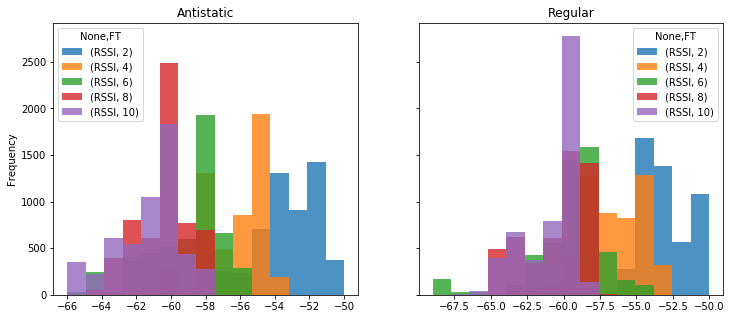

In [6]:
raw_data_0 = data.loc["antistatic"].drop(columns=["DATETIME", "MAC"]).unstack(level="FT")
raw_data_1 = data.loc["regular"].drop(columns=["DATETIME", "MAC"]).unstack(level="FT")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
raw_data_0.plot(ax=axes[0], kind="hist", alpha=.8, bins=15, title="Antistatic")
raw_data_1.plot(ax=axes[1], kind="hist", alpha=.8, bins=15, title="Regular")

# Rolling Mean

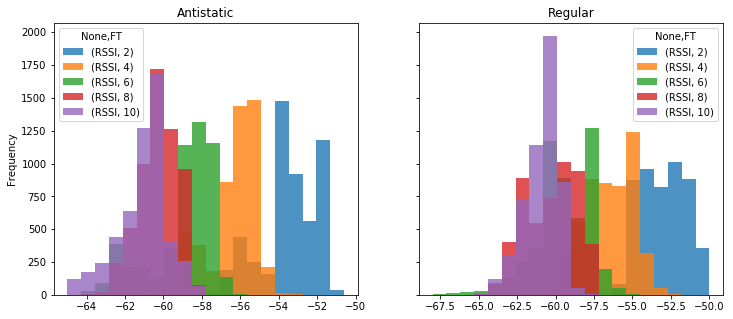

In [7]:
roll_mean0 = data.loc["antistatic"].groupby("MAC").rolling(5).mean().drop(columns=["MAC", "DATETIME"]).unstack(level="FT")
roll_mean1 = data.loc["regular"].groupby("MAC").rolling(5).mean().drop(columns=["MAC", "DATETIME"]).unstack(level="FT")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
roll_mean0.plot(ax=axes[0], kind='hist', bins=20, alpha=.8, title="Antistatic")
roll_mean1.plot(ax=axes[1], kind='hist', bins=20, alpha=.8, title="Regular")

# Rolling Max

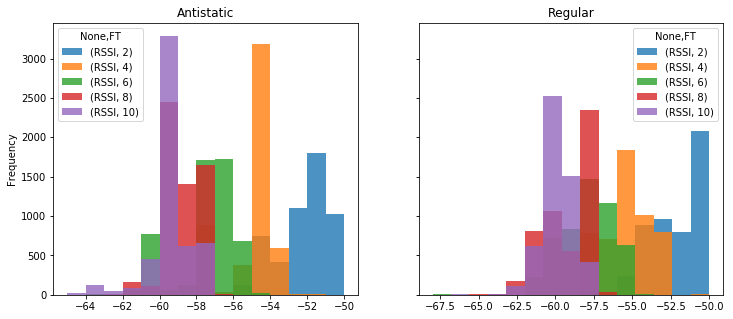

In [8]:
roll_max0 = data.loc["antistatic"].groupby("MAC").rolling(5).max().drop(columns=["MAC", "DATETIME"]).unstack(level="FT")
roll_max1 = data.loc["regular"].groupby("MAC").rolling(5).max().drop(columns=["MAC", "DATETIME"]).unstack(level="FT")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)
roll_max0.plot(ax=axes[0], kind='hist', bins=15, alpha=.8, title="Antistatic")
roll_max1.plot(ax=axes[1], kind='hist', bins=15, alpha=.8, title="Regular")

# Individual badges

## Antistatic Holders

### Rolling Mean

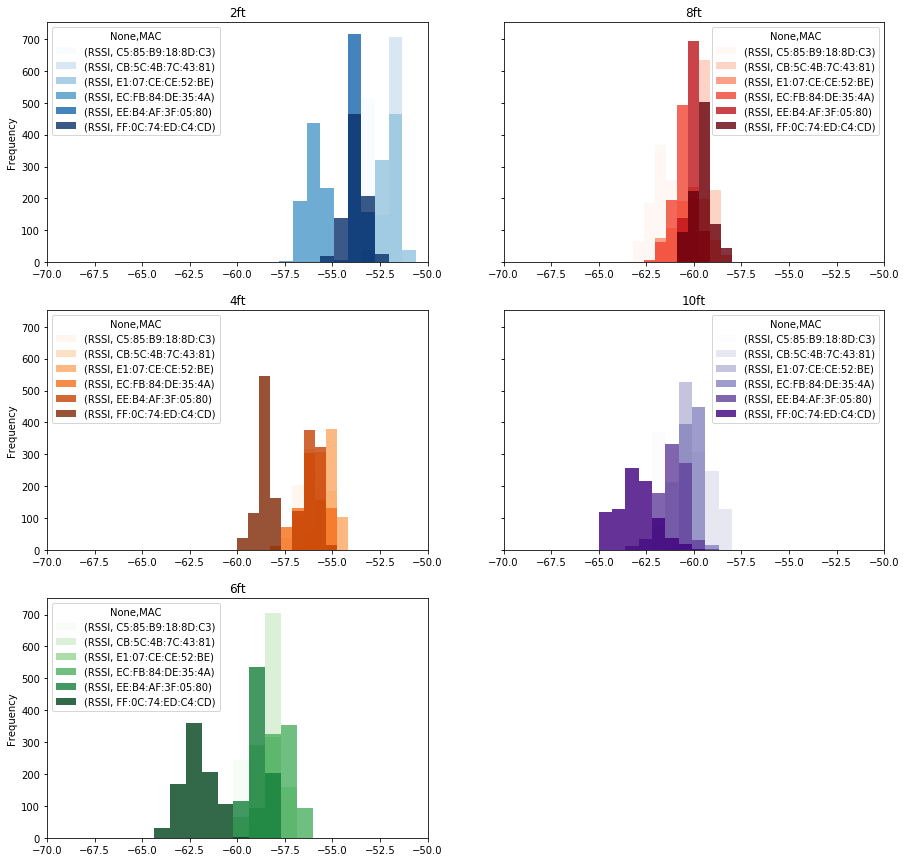

In [9]:
rmn2 = data.loc["antistatic"].loc[2].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn4 = data.loc["antistatic"].loc[4].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn6 = data.loc["antistatic"].loc[6].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn8 = data.loc["antistatic"].loc[8].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn10 = data.loc["antistatic"].loc[10].groupby("MAC").rolling(5).mean().unstack(level="MAC")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), sharey=True)
rmn2.plot(ax=axes[0][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Blues", title="2ft")
rmn4.plot(ax=axes[1][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Oranges", title="4ft")
rmn6.plot(ax=axes[2][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Greens", title="6ft")
rmn8.plot(ax=axes[0][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Reds", title="8ft")
rmn10.plot(ax=axes[1][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Purples", title="10ft")
fig.delaxes(axes[2][1])

### Rolling Max

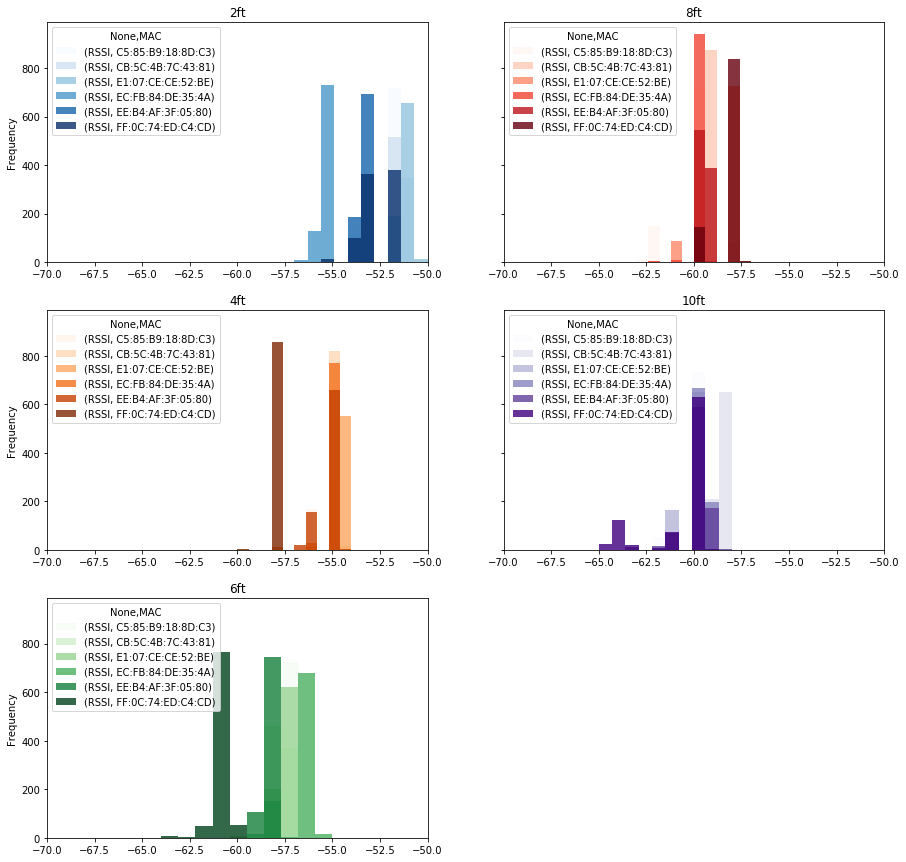

In [10]:
rmx2 = data.loc["antistatic"].loc[2].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx4 = data.loc["antistatic"].loc[4].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx6 = data.loc["antistatic"].loc[6].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx8 = data.loc["antistatic"].loc[8].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx10 = data.loc["antistatic"].loc[10].groupby("MAC").rolling(5).max().unstack(level="MAC")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), sharey=True)
rmx2.plot(ax=axes[0][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Blues", title="2ft")
rmx4.plot(ax=axes[1][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Oranges", title="4ft")
rmx6.plot(ax=axes[2][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Greens", title="6ft")
rmx8.plot(ax=axes[0][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Reds", title="8ft")
rmx10.plot(ax=axes[1][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Purples", title="10ft")
fig.delaxes(axes[2][1])

## Regular Holders

### Rolling Mean

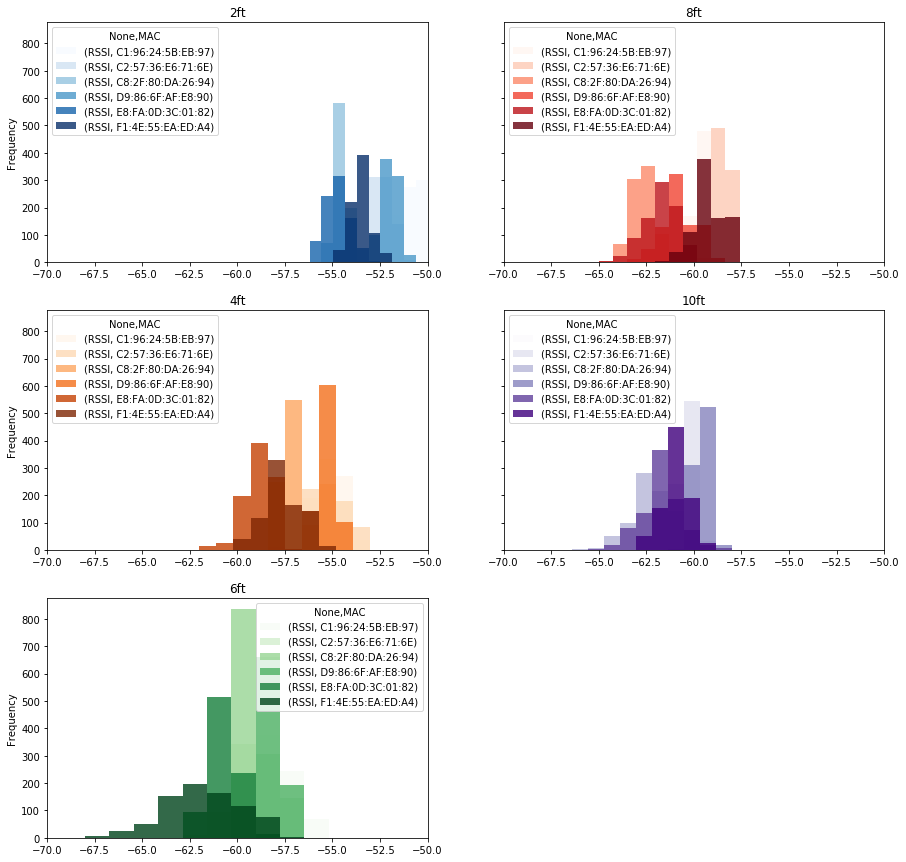

In [11]:
rmn2 = data.loc["regular"].loc[2].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn4 = data.loc["regular"].loc[4].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn6 = data.loc["regular"].loc[6].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn8 = data.loc["regular"].loc[8].groupby("MAC").rolling(5).mean().unstack(level="MAC")
rmn10 = data.loc["regular"].loc[10].groupby("MAC").rolling(5).mean().unstack(level="MAC")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), sharey=True)
rmn2.plot(ax=axes[0][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Blues", title="2ft")
rmn4.plot(ax=axes[1][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Oranges", title="4ft")
rmn6.plot(ax=axes[2][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Greens", title="6ft")
rmn8.plot(ax=axes[0][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Reds", title="8ft")
rmn10.plot(ax=axes[1][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Purples", title="10ft")
fig.delaxes(axes[2][1])

### Rolling Max

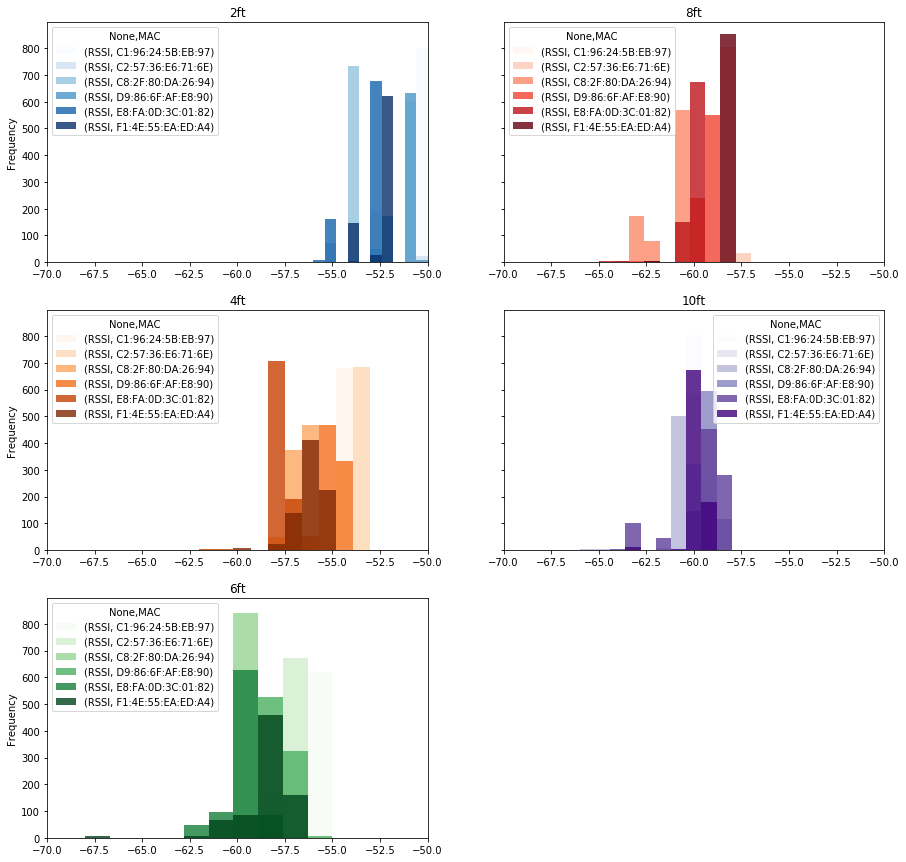

In [12]:
rmx2 = data.loc["regular"].loc[2].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx4 = data.loc["regular"].loc[4].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx6 = data.loc["regular"].loc[6].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx8 = data.loc["regular"].loc[8].groupby("MAC").rolling(5).max().unstack(level="MAC")
rmx10 = data.loc["regular"].loc[10].groupby("MAC").rolling(5).max().unstack(level="MAC")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), sharey=True)
rmx2.plot(ax=axes[0][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Blues", title="2ft")
rmx4.plot(ax=axes[1][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Oranges", title="4ft")
rmx6.plot(ax=axes[2][0], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Greens", title="6ft")
rmx8.plot(ax=axes[0][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Reds", title="8ft")
rmx10.plot(ax=axes[1][1], kind='hist', bins=10, alpha=.8, xlim=(-70,-50), colormap="Purples", title="10ft")
fig.delaxes(axes[2][1])